In [1]:
# applying Singular value Decomposition on arabic letters data set
# and nearest neighbor
# by almandub alanazi
# test file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# download the training data form 
#https://www.kaggle.com/mloey1/ahcd1/data
trainx = pd.read_csv("csvTrainImages 13440x1024.csv",header=None)
trainy = pd.read_csv("csvTrainLabel 13440x1.csv",header=None)
# give the labels the real name of the letter its named by https://www.kaggle.com/mloey1/ahcd1/data
arabic_labels = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']


# preparing the training data
trainx = trainx.values.astype('float32')
trainy = trainy.values.astype('int32')-1
trainy_=[]
for arr in trainy:
    trainy_.append(arr[0])
trainy = trainy_

trainx_reshaped = trainx.reshape([-1, 32, 32, 1])

# in the function, we will count how many times the letter apper in trainy
def count_numbers_copies(trainy):
    # letter_copies_counter hold the number of copies
    letter_copies_counter =[]
    # hold the indexes of each letter in trainy
    indexes = []
    for letter in range (28):
        indexes.append ([])
        counter = 0
        for index, i in enumerate (trainy):
            if i == letter:
                counter +=1
                indexes[letter].append(index)
        letter_copies_counter.append(counter)
    return letter_copies_counter,indexes
letters_copies ,indexes =  count_numbers_copies(trainy)

# create numpy zreos matrices for each letter in array of size 28 
def numpy_zreos_matrices(letters_copies):
    array_of_matrices = []
    for copies in letters_copies:
        # create matrix for each letter depend on the number of copies and
        # 1024 which is 32 * 32 pixels
        M = np.zeros(shape=(1024,copies))
        array_of_matrices.append(M)
    
    return array_of_matrices
letters_matrices = numpy_zreos_matrices(letters_copies)

# now we fill our letters_matrices with inforamtion imges from trainx
def preparation_function(trainy,trainx,letters_matrices):
    for i in range (28):
        counter =0
        for index , item  in enumerate(trainy):
            if item == i:
                letters_matrices[i][:,counter] = trainx[index]
                counter += 1
    return letters_matrices
letters_matrices = preparation_function(trainy,trainx,letters_matrices)

# find the distance between the image and the matrix of the letter
def find_the_distance(SVD,k,var,trainx ):
    U0 , S ,VT = SVD
    smallU0 = U0[:,0:k]
    d =trainx[var]
    I = np.eye(1024)
    v =np.matmul ((I - np.matmul (smallU0 , smallU0.T)) , d)
    distance = np.linalg.norm(v)  
    return distance
# here we import time for performance measurement
import time
def compute_SVD(M): # here compute SVD one time and save results in SVD_List
    U0 , S ,VT = np.linalg.svd(M)
    SVD = [U0 , S ,VT]
    return SVD
SVD_List=[]
for M in letters_matrices:
    SVD_List.append (compute_SVD(M))

In [8]:
# loading the test data 
testx = pd.read_csv("csvTestImages 3360x1024.csv",header=None)
testy = pd.read_csv("csvTestLabel 3360x1.csv",header=None)

# preparing the test data
testx = testx.values.astype('float32')
testy = testy.values.astype('int32')-1
testy_=[]
for arr in testy:
    testy_.append(arr[0])
testy = testy_
# for showing the letter
testx_reshaped = testx.reshape([-1, 32, 32, 1])
print (testx.shape)

(3360, 1024)


In [4]:
f = open ("Best_k_list.txt","r")
Best_k_list = f.read()
f.close()
presantage_list=[]
print (Best_k_list)
Best_k_list = Best_k_list.replace("[", "")
Best_k_list = Best_k_list.replace("]", "")
Best_k_list = Best_k_list.split(',')
for i in Best_k_list:
    i = int (i)
    presantage_list.append(int (i)/140)
best_K_presantage = 90.0 # here we chosse the presantage the we think k is good 
best_K =0
for index ,i in enumerate (presantage_list):
    
    if (i*100) >= best_K_presantage:
        best_K = index +1
        break
   
print ("the best k for this samples of traning data is ",best_K)


[43, 50, 69, 81, 86, 92, 96, 106, 107, 112, 111, 115, 112, 119, 123, 123, 124, 124, 126, 127, 127, 125, 127, 128, 128, 132, 133, 133, 133, 133]
the best k for this samples of traning data is  19


In [5]:
Errors_list  = []

k = best_K
counter = 0 #correct prediction counter
for var in range (len(testy)):
    distances = []
    for SVD in SVD_List:
        distance = find_the_distance(SVD,k,var,testx)
        distances.append(distance)
    x = min(v for v in distances)   # here we take the smallest distance 
    predict_letter = distances.index(x)    # we will take the index of that smallest distance
    
    if predict_letter == testy[var]:
        counter+=1
    else:
        L = [var,predict_letter]# the first index will be an index of a real letter,
                                # second is wrong predicted
        Errors_list.append(L)
print ("Our modle with k = ",k)
percentage=100* (counter/len(testy))
print ("Has correct prediction percentage by ",percentage, "%")
print (len (Errors_list))

Our modle with k =  19
Has correct prediction percentage by  52.976190476190474 %
1580


On the plot the left colon is the test images with the wrong prediction
On the middle a good picture for the correct letter
On the right a good picture for  the wrong prediction letter


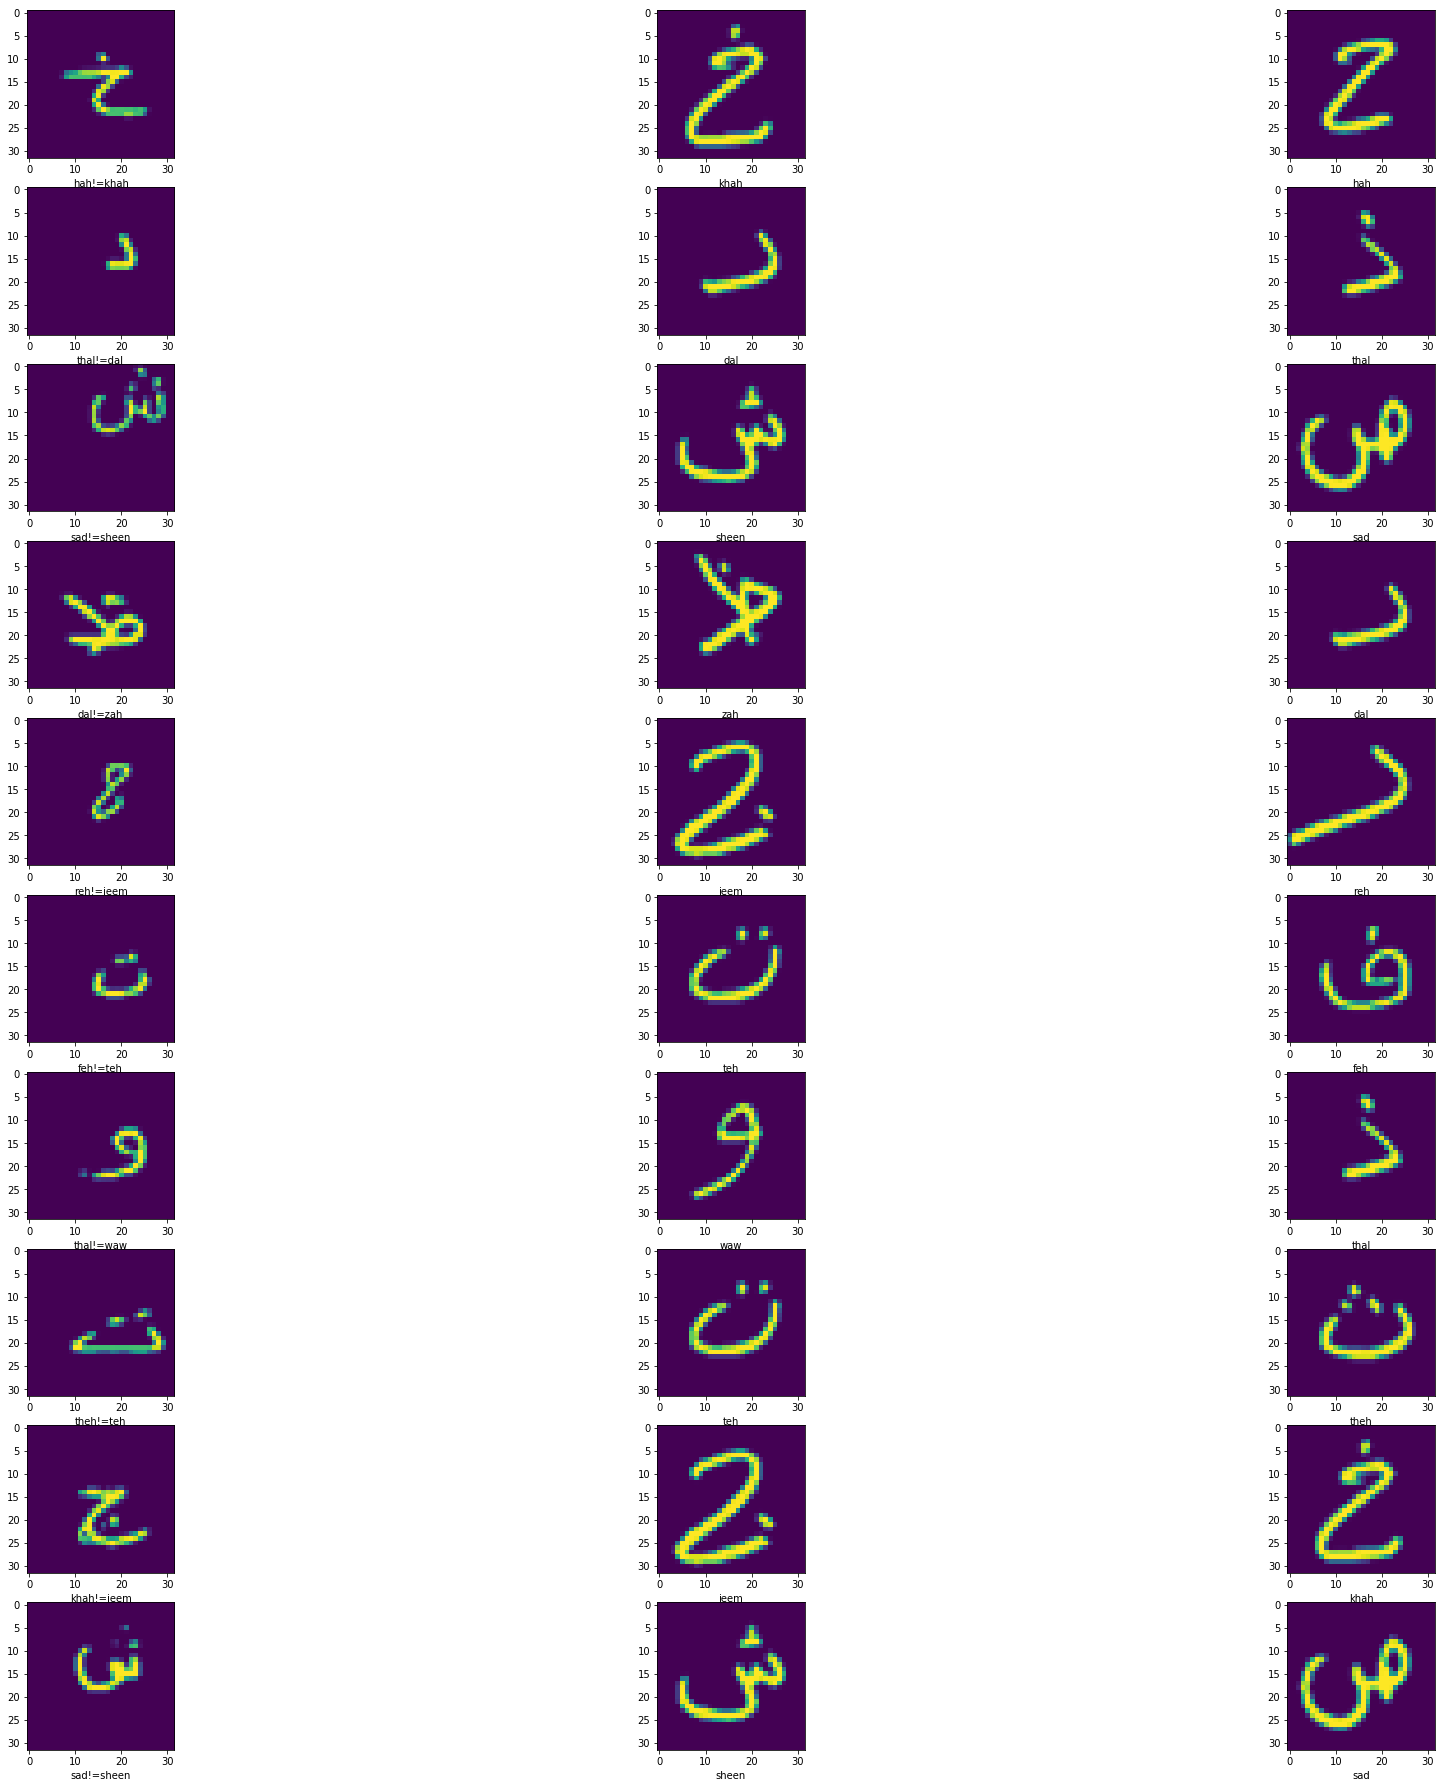

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
five = 10
import matplotlib.pyplot as plt
%matplotlib inline

Errors_list2 =Errors_list
# here I found the index of good pictuer for the correct letter I checked them all 
arabic_good_images=[]
for i in range(28):
    index= i * 8
    arabic_good_images.append(index)

fig,axs = plt.subplots(nrows=10,ncols=3,figsize=(32,32))

for i in range (five):
    x = random.randint(0,len(Errors_list2)-1) # random choice of index
    var   = Errors_list2[x][0]
    wrong = Errors_list2[x][1]
    Errors_list2.pop(x)  # deleted that item
    for j in range(3): 
        if j == 0:
            # here show pictuer for letter taht we miss
            axs[i,j].imshow(testx_reshaped[var].squeeze().T)
             
            Title = arabic_labels[wrong] +'!=' +arabic_labels[testy[var]]
            axs[i,j].set_xlabel(Title, fontsize=10)
        elif j ==1:
            # here show good pictuer for that correct letter
            good =arabic_good_images[testy[var]] 
            axs[i,j].imshow(trainx_reshaped[good].squeeze().T)
            Title = arabic_labels[testy[var]]
            axs[i,j].set_xlabel(Title, fontsize=10)
        else:
            # here show good pictuer for that correct letter
            good =arabic_good_images[wrong] 
            axs[i,j].imshow(trainx_reshaped[good].squeeze().T)
            Title = arabic_labels[wrong]
            axs[i,j].set_xlabel(Title, fontsize=10)
            
print ("On the plot the left colon is the test images with the wrong prediction")
print ("On the middle a good picture for the correct letter")
print ("On the right a good picture for  the wrong prediction letter")
 
plt.show() 

In the Arabic alphabet, some letters are very near to each other in somehow it describe the low correct percentage that I am getting here